In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # 作圖
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #將字串資料進行編碼
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Read data

In [2]:
train_data = pd.read_csv('/Users/hsinyu/Desktop/ML/Kaggle/titanic/train.csv')
test_data = pd.read_csv('/Users/hsinyu/Desktop/ML/Kaggle/titanic/test.csv')

# combined training and testing data
# df = pd.concat([train_data, test_data], axis = 0)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2. Data Visualization

<Axes: xlabel='Age', ylabel='Count'>

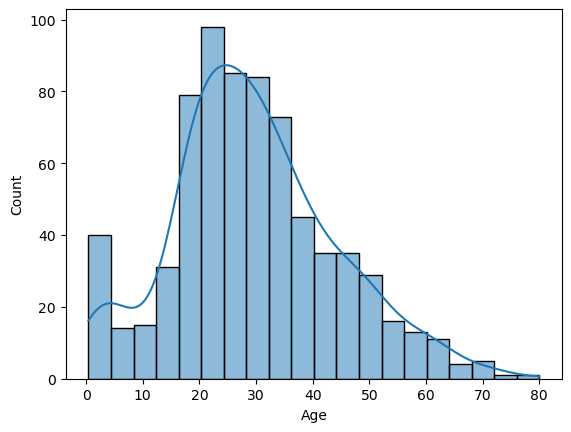

In [6]:
sns.histplot(train_data['Age'], kde=True)

/var/folders/nd/d7thqlnx6nb8g_qhrvb_2dbm0000gn/T/ipykernel_6986/3951585466.py:29: UserWarning: Glyph 12577 (\N{BOPOMOFO LETTER OU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hsinyu/anaconda3/envs/demo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12577 (\N{BOPOMOFO LETTER OU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Survived
0    549
1    342
Name: count, dtype: int64


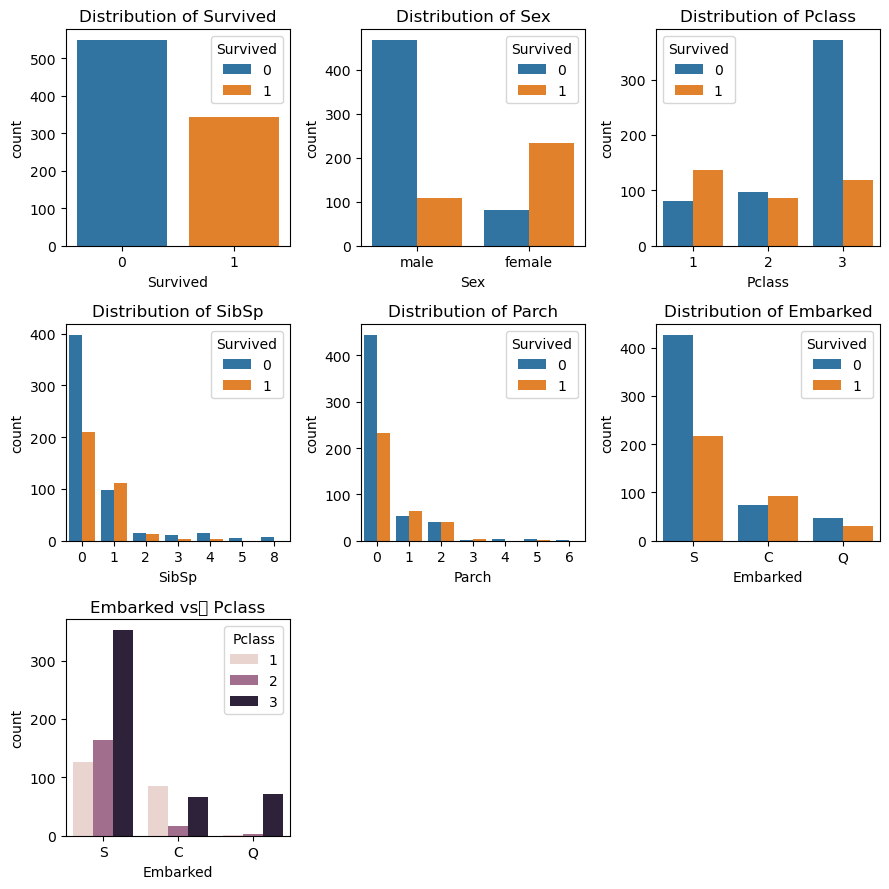

In [7]:
# Visualize the count of survivors for columns 'sex','pclass','sibsp','parch','embarked'
cols = ['Survived', 'Sex','Pclass','SibSp','Parch','Embarked']

n_rows = 3
n_cols = 3

# The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows,n_cols,figsize = (n_cols * 3, n_rows * 3))

# 展平 axs 以方便迭代處理
axs = axs.ravel()  # ravel 會將子圖陣列展平成一維


# 遍歷每個列名和子圖
for i, col in enumerate(cols):
    sns.countplot(x=col, data=train_data, hue='Survived', ax=axs[i])  # 在對應的子圖繪製圖形
    axs[i].set_title(f'Distribution of {col}')        # 設置標題

embarked_ax = axs[len(cols)]  # 獲取下一個子圖
sns.countplot(x='Embarked', data=train_data, hue='Pclass', ax=embarked_ax)  # 繪製圖形
embarked_ax.set_title('Embarked vsㄡ Pclass')  # 設置標題
        

# 如果有多餘的子圖（空白），刪除它們
for j in range(len(cols)+1, len(axs)): # 加一是因為新增了一個圖
    fig.delaxes(axs[j])

# 自動調整子圖間距
plt.tight_layout()

print(train_data['Survived'].value_counts())

# 顯示圖形
plt.show()


# Result:
# 1.女性存活率比較高
# 2.艙等(Pclass)較高，存活率較高
# 3.兄弟姊妹＋老婆丈夫數量(SibSp)，可能有帶兄弟姊妹、老婆丈夫的乘客存活機會較高
# 4.父母小孩的數量(Parch)，有帶小孩父母親的存活機會較高
# 5.出發港口(Embarked)，從S碼頭出發艙位較低，存活機會較低

### 3. Fill in NA values

In [8]:
train_data = pd.read_csv('/Users/hsinyu/Desktop/ML/Kaggle/titanic/train.csv')

# check NA
train_data.info()
train_data.describe() 

# Age、Cabin、Embarked含有缺失資料，其中
# 1、Age(數值型)缺失177筆 ，使用平均值代替缺失值
# 2、Cabin(分類型)缺失687筆 ：遺失比例居高，觀察之內資料性質偏向具唯一性故參考價值不高。
# 3、Embarked(分類型) 缺失2筆，比例小選擇直接忽略

## (1) Cabin
train_data = train_data.drop(['Cabin'], axis=1) #axis=1對column

## (2) Embarked
# Remove the rows with missing values
train_data = train_data.dropna(subset =  ['Embarked'])

## (3) Age
# Using the median to fill in NA can maintain the overall trend of the data.
mean_age = train_data['Age'].mean()
train_data.fillna({'Age': mean_age}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 4. Data preprocessing

In [9]:
# Feature Selection: 淘汰不重要的特徵，根據資料的獨特性篩選。利用unique，將重複性小的資料刪除
print(train_data.columns)
unique_ratio = train_data.apply(lambda col: col.nunique())
print(unique_ratio)
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)

# Data standardization

# Label encoder: 將類別或文字資料轉成數字，字串的時間複雜度會比數值型高許多，所以需要做編碼加快運算
encoder = LabelEncoder() #初始化
## Encode the sex column
train_data.iloc[:, 2] = encoder.fit_transform(train_data.iloc[:, 2].values)
## Encode the embarked column
train_data.iloc[:, 6] = encoder.fit_transform(train_data.iloc[:, 6].values)


train_data['Sex'] = train_data['Sex'].astype(int)
train_data['Embarked'] = train_data['Embarked'].astype(int)
train_data.dtypes

# 'Sex' 欄位有 ['male', 'female'] - > [1, 0]
# 'Embarked' 欄位有 ['S', 'C','Q'] - > [2,0,1]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object

#### 5. Construct a Machine Learning Model

In [10]:
# https://ithelp.ithome.com.tw/articles/10217431 步驟和結果參考

def MLmodels(x_train, y_train):

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 42)
    log.fit(X_train, y_train)

    # Support Vector Machines (SVM)
    from sklearn.svm import SVC
    svm_lin = SVC(kernel='linear')
    svm_lin.fit(x_train, y_train)

    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(x_train, y_train)

    svm_sig = SVC(kernel='sigmoid')
    svm_sig.fit(x_train, y_train)

    # K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, random_state=42)
    forest.fit(x_train, y_train)
    
    # XGBoost
    from xgboost import XGBClassifier
    xgboost = XGBClassifier(n_estimators=10, random_state=42)
    xgboost.fit(x_train, y_train)

    # Neural Network
    from sklearn.neural_network import MLPClassifier
    MLP_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,2), random_state=42)
    MLP_model.fit(x_train, y_train)

    # GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gaussianNB = GaussianNB()
    gaussianNB.fit(x_train, y_train)
    
    # Print the training accuracy for each medel
    print('1. Logistic regression training accuracy:', log.score(x_train, y_train))
    print('2_1. SVM linear training accuracy:', svm_lin.score(x_train, y_train))
    print('2_2. SVM radial basis function (RBF) training accuracy: ', svm_rbf.score(x_train, y_train))
    print('2_3. SVM sigmoid training accuracy: ', svm_sig.score(x_train, y_train))
    print('3. K-Nearest Neighbor training accuracy: ', knn.score(x_train, y_train))
    print('4. Decision tree training accuracy: ', tree.score(x_train, y_train))
    print('5. Random forest training accuracy: ', forest.score(x_train, y_train))
    print('6. XGBoost training accuracy: ', xgboost.score(x_train, y_train))
    print('7. Neural network training accuracy: ', MLP_model.score(x_train, y_train))
    print('8. GaussianNB training accuracy: ', gaussianNB.score(x_train, y_train))
    return log, svm_lin, svm_rbf, svm_sig, knn, tree, forest, xgboost, MLP_model, gaussianNB


In [11]:
# Split the data into independent 'X' and dependent 'y' variables
X = train_data.iloc[:, 1:6].values
y = train_data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLmodels(X_train, y_train)

1. Logistic regression training accuracy: 0.7932489451476793
2_1. SVM linear training accuracy: 0.7834036568213784
2_2. SVM radial basis function (RBF) training accuracy:  0.6427566807313643
2_3. SVM sigmoid training accuracy:  0.5260196905766527
3. K-Nearest Neighbor training accuracy:  0.8438818565400844
4. Decision tree training accuracy:  0.9184247538677919
5. Random forest training accuracy:  0.9127988748241913
6. XGBoost training accuracy:  0.870604781997187
7. Neural network training accuracy:  0.6666666666666666
8. GaussianNB training accuracy:  0.7651195499296765


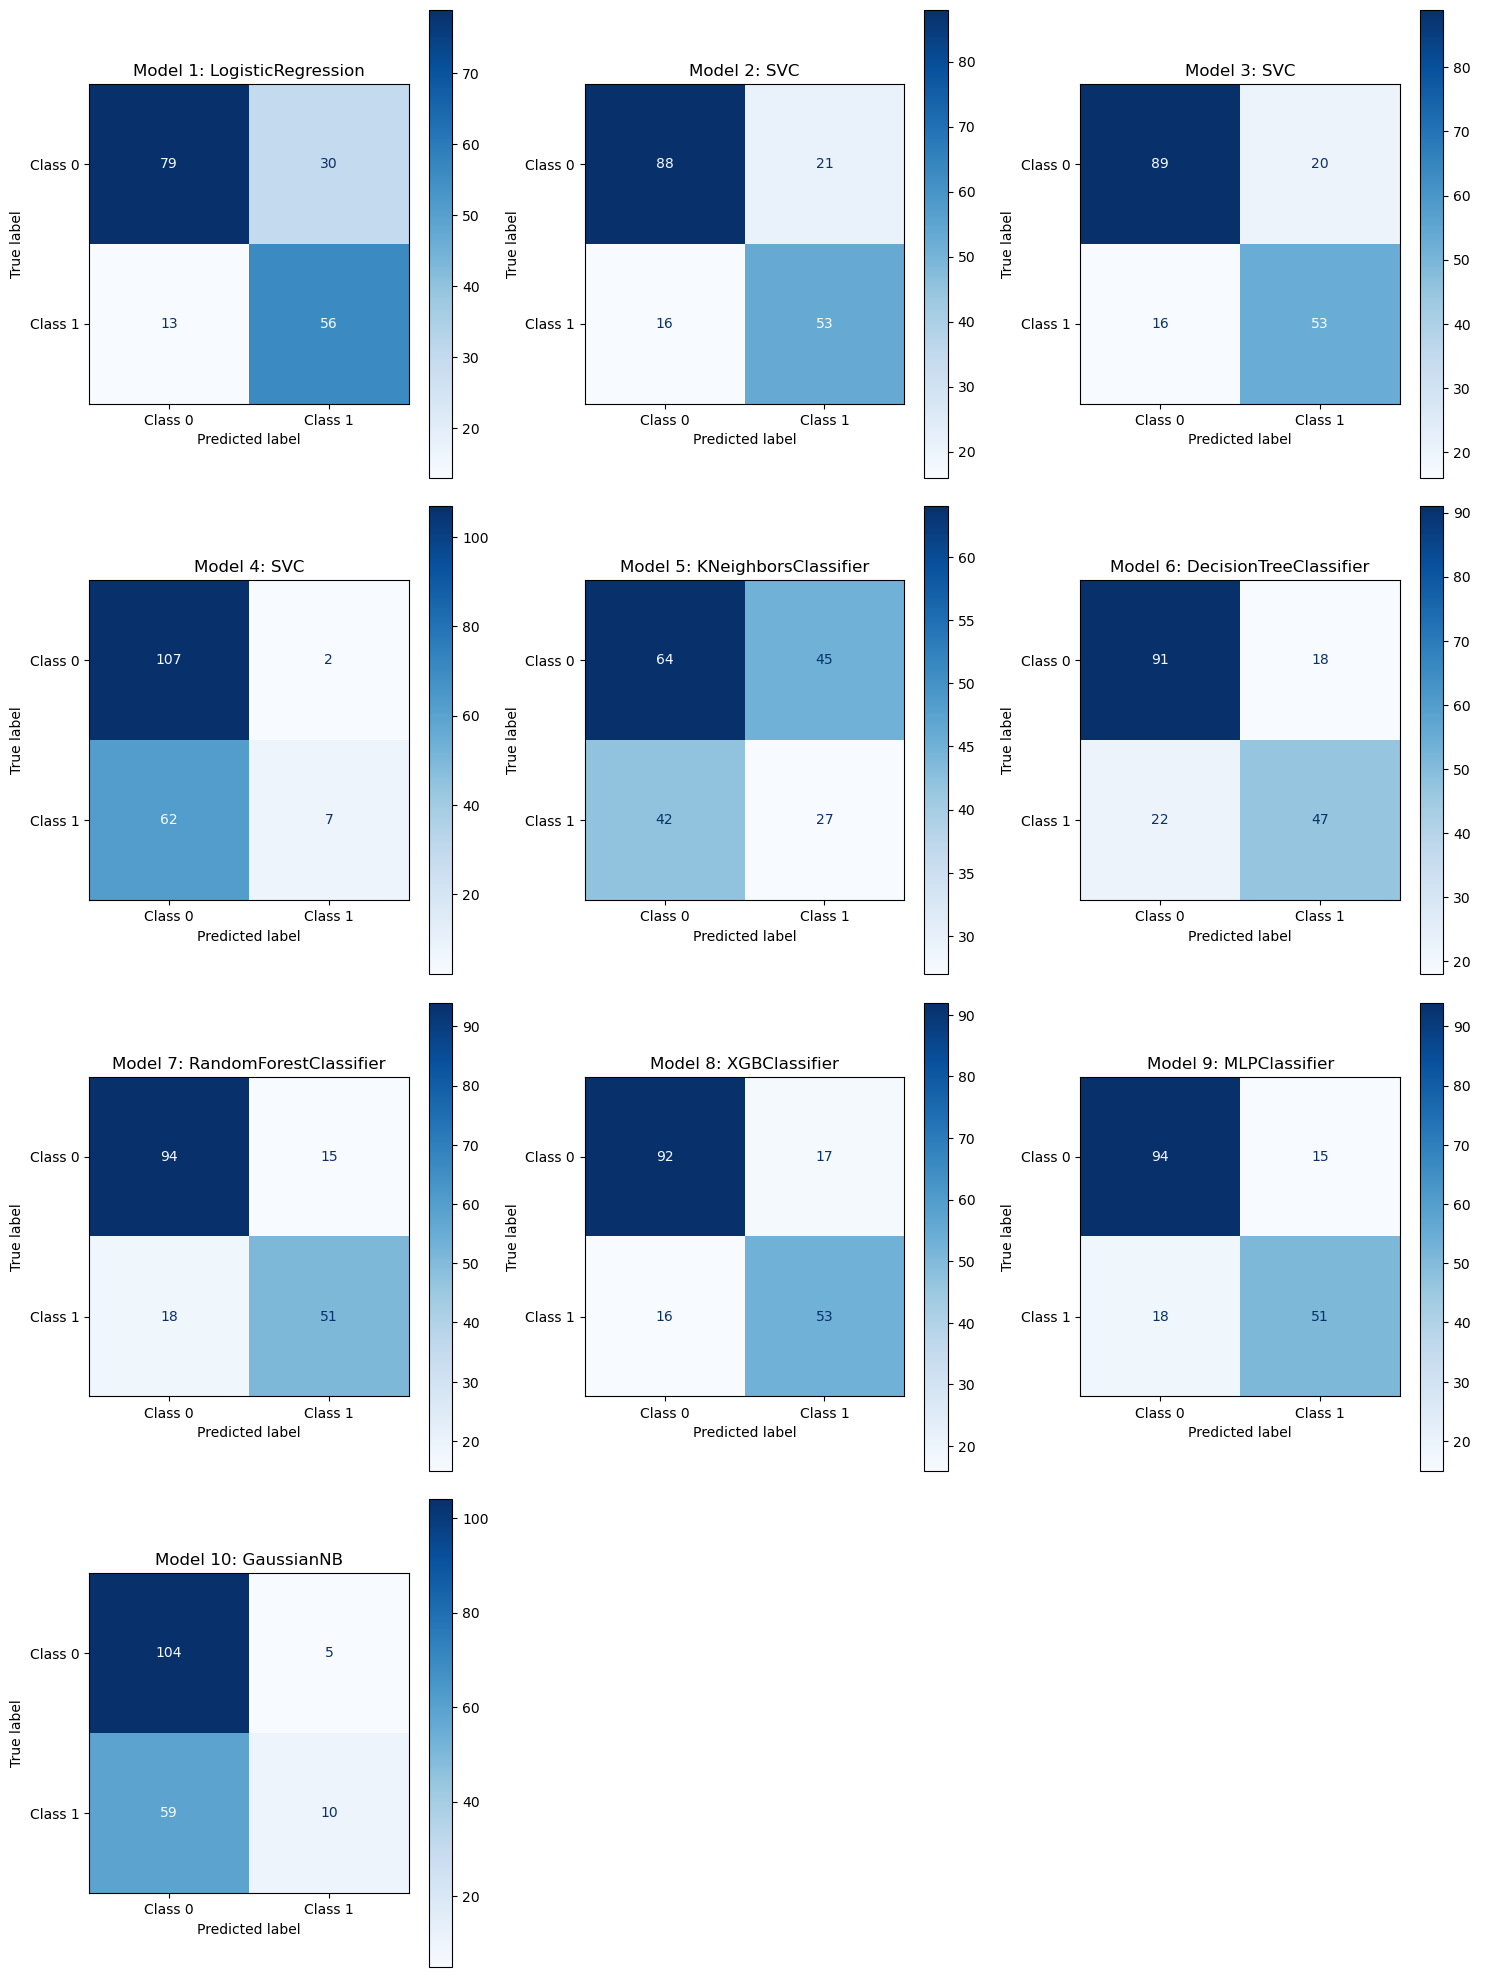

In [12]:
# display the confusion matrix
num_models = len(model)
columns = 3  # 每行 3 個圖
rows = (num_models + columns - 1) // columns  # 計算需要的行數

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))  # 調整圖表大小
axes = axes.flatten()

# 顯示混淆矩陣
model_names = [type(m).__name__ for m in model]
for i, (name, ax) in enumerate(zip(model_names, axes)):
    cm = confusion_matrix(y_test, model[i-1].predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap=plt.cm.Blues, ax=ax) 
    ax.set_title(f"Model {i + 1}: {name}") 

# 隱藏多餘的子圖
for ax in axes[num_models:]:
    ax.axis("off")

plt.tight_layout()  # 自動調整間距
plt.show()

In [13]:
# Decision tree and Random forest have higher accuracy
# Display the importance of each feature

## Decision tree
# Get feature important 
decisionTree = model[6]
importances = pd.DataFrame({'feature': train_data.iloc[:, 1:6].columns, 'importance': np.round(decisionTree.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Age,0.411
Sex,0.330
Pclass,0.133
SibSp,0.079
Parch,0.047


In [14]:
## Random forest
# Get feature important 
decisionTree = model[7]
importances = pd.DataFrame({'feature': train_data.iloc[:, 1:6].columns, 'importance': np.round(decisionTree.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Sex,0.756
Pclass,0.144
SibSp,0.058
Age,0.025
Parch,0.017


In [15]:
# preprocessing test data

## Age
# Using the median to fill in NA can maintain the overall trend of the data.
mean_age = test_data['Age'].mean()
test_data.fillna({'Age': mean_age}, inplace=True)


test_data = test_data.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

# Label encoder
encoder = LabelEncoder()
## Encode the sex column
test_data.iloc[:, 2] = encoder.fit_transform(test_data.iloc[:, 2].values)
## Encode the embarked column
test_data.iloc[:, 6] = encoder.fit_transform(test_data.iloc[:, 6].values)


test_data['Sex'] = test_data['Sex'].astype(int)
test_data['Embarked'] = test_data['Embarked'].astype(int)
test_data.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
dtype: object

In [16]:
X_test = test_data.iloc[:, 1:6].values

# Decision Tree
test_pred = model[6].predict(X_test)
DecisionTree_test = pd.DataFrame({
    "PassengerId": test_data.iloc[:, 0].values,
    "Survived": test_pred                     # 預測值
})
DecisionTree_test.to_csv('/Users/hsinyu/Desktop/ML/Kaggle/titanic/DecisionTree_pred.csv', index=False)

# Random Forest
test_pred = model[7].predict(X_test)
RandomForest_test = pd.DataFrame({
    "PassengerId": test_data.iloc[:, 0].values,
    "Survived": test_pred                     # 預測值
})
RandomForest_test.to_csv('/Users/hsinyu/Desktop/ML/Kaggle/titanic/RandomForest_test_pred.csv', index=False)


In [17]:
# Identifying rows where the predictions of the two models differ.
comparison = pd.DataFrame({
    "PassengerId": DecisionTree_test["PassengerId"],
    "DecisionTree_Predictions": DecisionTree_test["Survived"],
    "RandomForest_Predictions": RandomForest_test["Survived"]
})

# 找出預測不同的行
mismatches = comparison[comparison["DecisionTree_Predictions"] != comparison["RandomForest_Predictions"]]

# 顯示結果
print("以下行的預測不同：")
print(mismatches)

以下行的預測不同：
     PassengerId  DecisionTree_Predictions  RandomForest_Predictions
4            896                         0                         1
18           910                         0                         1
50           942                         1                         0
64           956                         1                         0
70           962                         0                         1
73           965                         1                         0
75           967                         1                         0
79           971                         0                         1
82           974                         0                         1
94           986                         0                         1
97           989                         1                         0
104          996                         0                         1
110         1002                         1                         0
125         1017        